Repeating DM-19536 study of partitiong model but also look at how much area pixels that overlap CCD are going to take. The idea is that we want to read datya from all pixels and do not filter it on server side using fine-grained pixelId. Smaller partitiong piuxels should of course give lower overhead, but we also want to limit number of partitions that we read.

In [45]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
plt.style.use('bmh')


In [7]:
data = []
for mode in ["htm", "q3c", "mq3c"]:
    for level in [7, 8, 9, 10, 11]:
        fname = f"data/DM-23604/pixels-per-tile-{mode}-{level}.csv.gz"
        ds = pd.read_csv(fname, header=0, dtype={"pixels": int, "area_deg_sq": float})
        pixels = ds.pixels.mean()
        area = ds.area_deg_sq.mean()
        fname = f"data/DM-23604/tiles-per-pixel-{mode}-{level}.csv.gz"
        ds = pd.read_csv(fname, header=0, dtype=int)
        tiles = ds.tiles.mean()
        data += [(mode, level, pixels, area, tiles)]


In [14]:
stat = pd.DataFrame(data, columns=['mode', 'level', 'pix_per_tile', 'area_per_tile', 'tile_per_pix'])

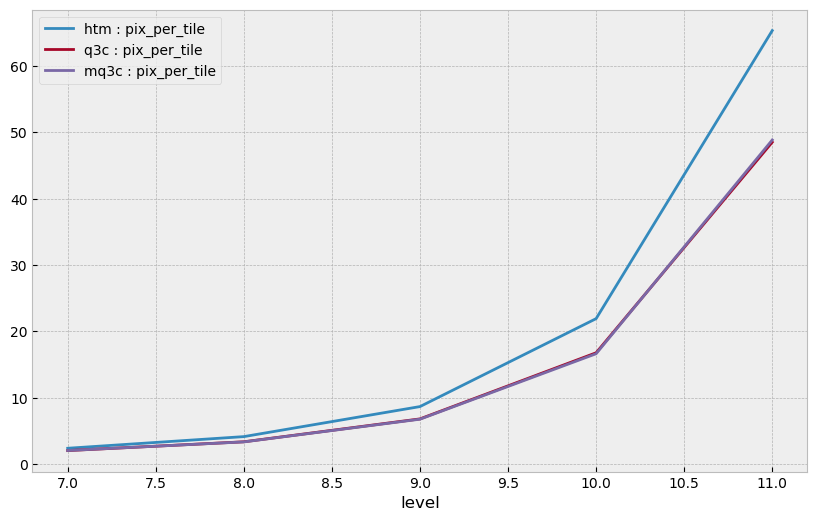

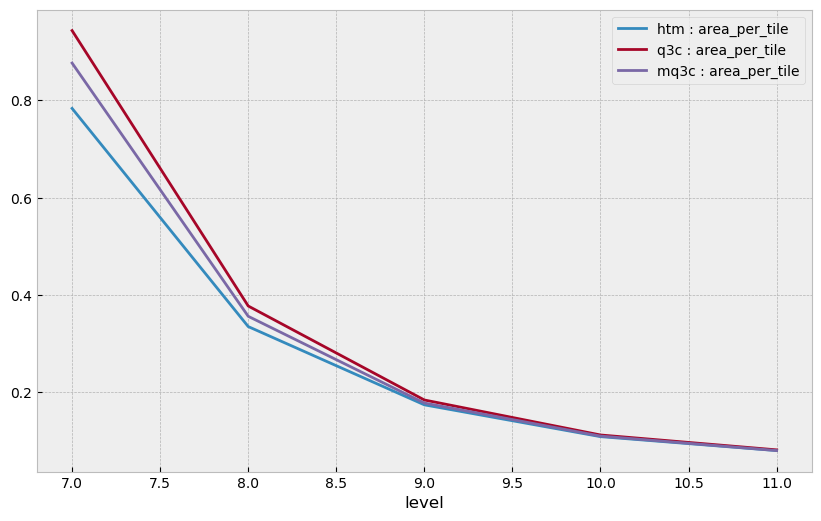

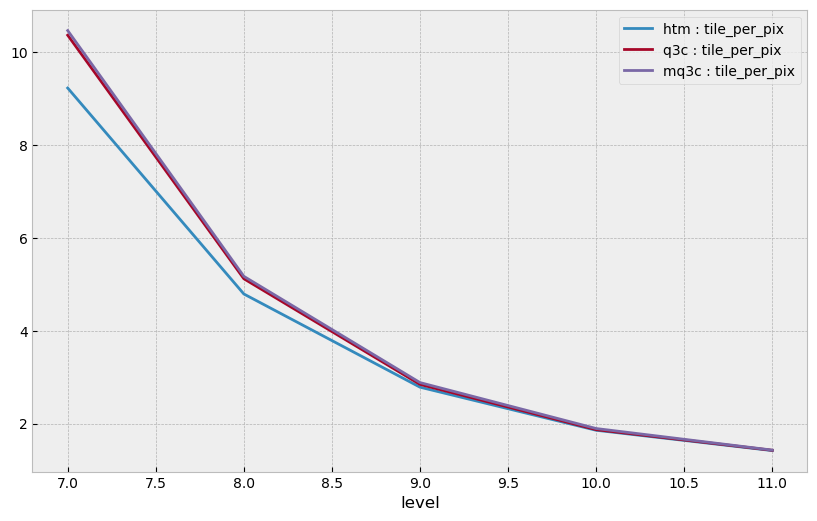

In [16]:

for plot in ('pix_per_tile', 'area_per_tile', 'tile_per_pix'):
    ax = None
    for mode in ["htm", "q3c", "mq3c"]:
        mstat = stat[stat['mode']==mode].set_index('level')
        ax = mstat.plot(y=plot, label=mode+' : '+plot, ax=ax, figsize=(10, 6))

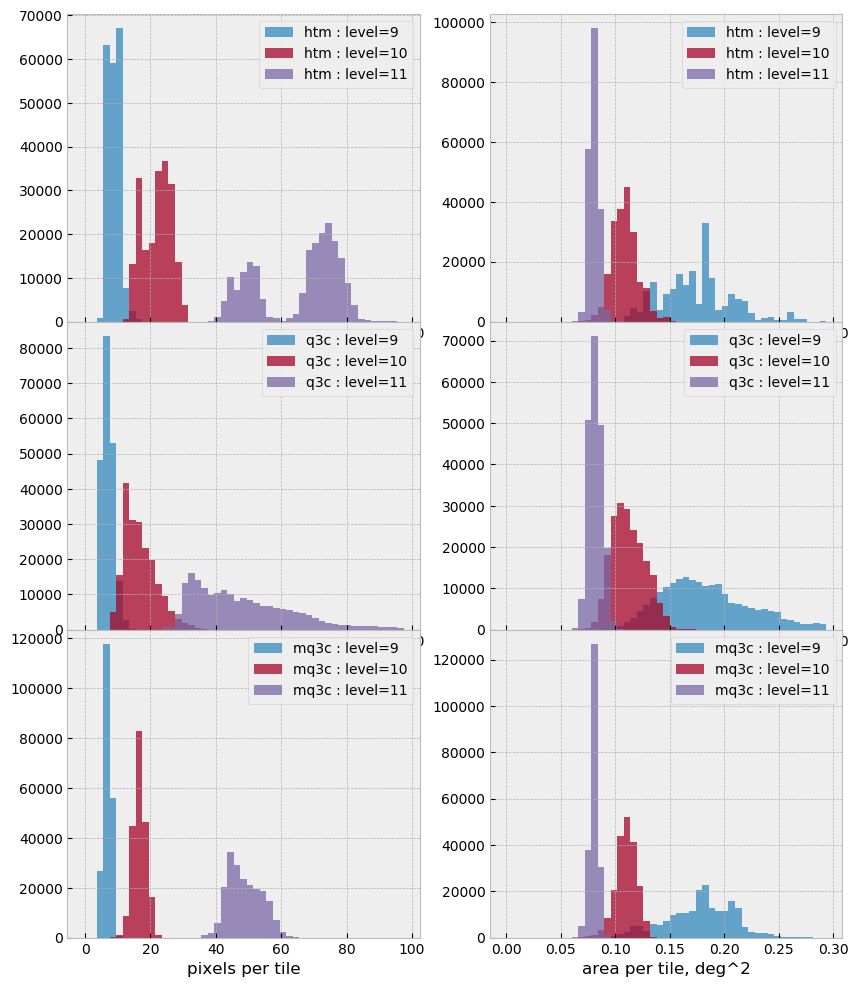

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=False)
fig.subplots_adjust(hspace=0)

idx = 0
pix_bins = [x-0.5 for x in range(0, 100, 2)]
area_bins = [x*.006 for x in range(50)]
for mode in ["htm", "q3c", "mq3c"]:
    for color, level in enumerate([9, 10, 11]):
        color = colors.to_rgb(f"C{color}") + tuple([0.75])
        label = f"{mode} : level={level}"
        
        fname = f"data/DM-23604/pixels-per-tile-{mode}-{level}.csv.gz"
        ds = pd.read_csv(fname, header=0, dtype={"pixels": int, "area_deg_sq": float})

        ax = axes[idx][0]
        ds.pixels.hist(bins=pix_bins, ax=ax, color=color, label=label)
        ax.legend()
        ax.set_xlabel("pixels per tile")

        ax = axes[idx][1]
        ds.area_deg_sq.hist(bins=area_bins, ax=ax, color=color, label=label);
        ax.legend()
        ax.set_xlabel("area per tile, deg^2")

    idx += 1